In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('911.csv')
df.sample(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
228264,40.121371,-75.332361,ARCH ST; NORRISTOWN; Station 308A; 2017-07-25...,19401.0,EMS: VEHICLE ACCIDENT,2017-07-25 10:27:53,NORRISTOWN,ARCH ST,1
350475,40.097222,-75.376195,SCHUYLKILL EXPY & E MATSONFORD RD UNDERPASS; U...,NaN,Traffic: DISABLED VEHICLE -,2018-05-23 16:58:00,UPPER MERION,SCHUYLKILL EXPY & E MATSONFORD RD UNDERPASS,1
454298,40.080623,-75.126545,OLD YORK RD & GREEN BRIAR RD; CHELTENHAM; Sta...,19027.0,EMS: LACERATIONS,2019-01-31 14:41:48,CHELTENHAM,OLD YORK RD & GREEN BRIAR RD,1
525898,40.101647,-75.252750,JOSHUA RD & FLOURTOWN RD; WHITEMARSH; 2019-07-...,19444.0,Traffic: VEHICLE ACCIDENT -,2019-07-25 11:51:55,WHITEMARSH,JOSHUA RD & FLOURTOWN RD,1
335719,40.114547,-75.121755,SUSQUEHANNA RD & OLD YORK RD; ABINGTON; 2018-0...,19001.0,Traffic: VEHICLE ACCIDENT -,2018-04-16 14:59:32,ABINGTON,SUSQUEHANNA RD & OLD YORK RD,1
630712,40.123682,-75.325495,GLENN VALLEY DR & E ROBERTS ST; NORRISTOWN; S...,19401.0,EMS: RESPIRATORY EMERGENCY,2020-04-23 21:12:42,NORRISTOWN,GLENN VALLEY DR & E ROBERTS ST,1
331736,40.125729,-75.132427,KENDERTON AVE & EASTON RD; ABINGTON; Station ...,19001.0,EMS: ALTERED MENTAL STATUS,2018-04-06 06:40:48,ABINGTON,KENDERTON AVE & EASTON RD,1
312614,40.129750,-75.373279,W MAIN ST; WEST NORRITON; Station 308B; 2018-...,NaN,EMS: VEHICLE ACCIDENT,2018-02-22 20:20:01,WEST NORRITON,W MAIN ST,1


In [3]:
df['e'].value_counts()

e
1    663522
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [6]:
#Top 10 zipcodes for 911 calls

df['zip'].value_counts().head(10)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: count, dtype: int64

In [7]:
#Top 10 townships for 911 calls

df['twp'].value_counts().head(10)

twp
LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: count, dtype: int64

In [13]:
df['Reason'] = df['title'].apply(lambda st : st.split(':')[0])

In [14]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

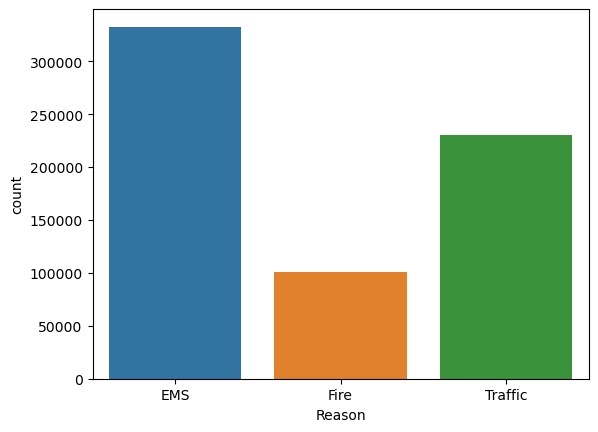

In [15]:
sns.countplot(x='Reason',data=df)

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [30]:
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.day_name())
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week,Date
270044,40.106839,-75.123804,OLD YORK RD & HARTE RD; ABINGTON; 2017-11-11 @...,19046.0,Traffic: VEHICLE ACCIDENT -,2017-11-11 12:49:22,ABINGTON,OLD YORK RD & HARTE RD,1,Traffic,12,11,Saturday,2017-11-11
636429,40.151136,-75.197778,LOCH ALSH AVE & FORT WASHINGTON AVE; UPPER DUB...,19034.0,Traffic: HAZARDOUS ROAD CONDITIONS -,2020-05-14 16:39:36,UPPER DUBLIN,LOCH ALSH AVE & FORT WASHINGTON AVE,1,Traffic,16,5,Thursday,2020-05-14
77835,40.102063,-75.348993,DEKALB ST & W 9TH ST; BRIDGEPORT; 2016-06-30 @...,19405.0,Fire: UNKNOWN TYPE FIRE,2016-06-30 21:55:54,BRIDGEPORT,DEKALB ST & W 9TH ST,1,Fire,21,6,Thursday,2016-06-30
363381,40.180778,-75.441726,RIDGE PIKE; UPPER PROVIDENCE; 2018-06-25 @ 18:...,NaN,Fire: VEHICLE ACCIDENT,2018-06-25 18:22:14,UPPER PROVIDENCE,RIDGE PIKE,1,Fire,18,6,Monday,2018-06-25
567159,40.097222,-75.376195,HIGHVIEW DR & DEAD END; UPPER MERION; Station...,NaN,EMS: FALL VICTIM,2019-11-01 23:09:46,UPPER MERION,HIGHVIEW DR & DEAD END,1,EMS,23,11,Friday,2019-11-01


<Axes: xlabel='Day of Week', ylabel='count'>

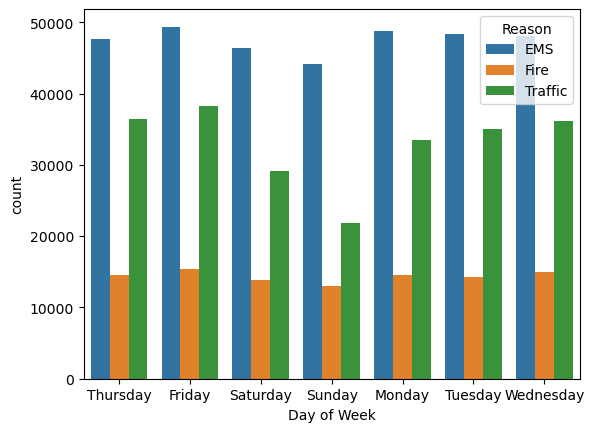

In [28]:
sns.countplot(x='Day of Week',data=df, hue = 'Reason')

<Axes: xlabel='Month', ylabel='count'>

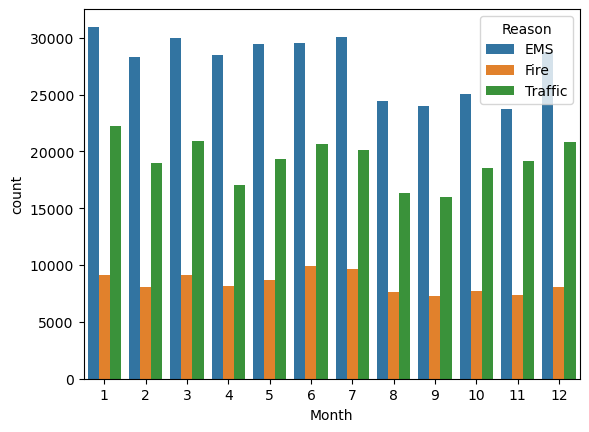

In [29]:
sns.countplot(x='Month',data=df, hue = 'Reason')

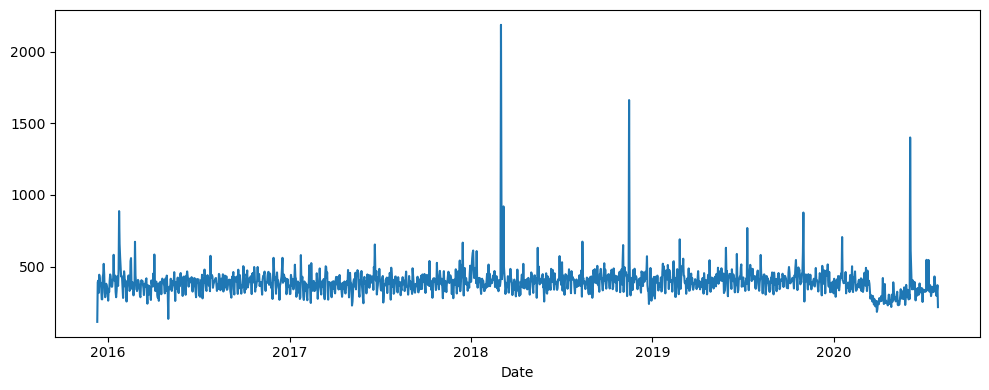

In [36]:
plt.figure(figsize=(10,4))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

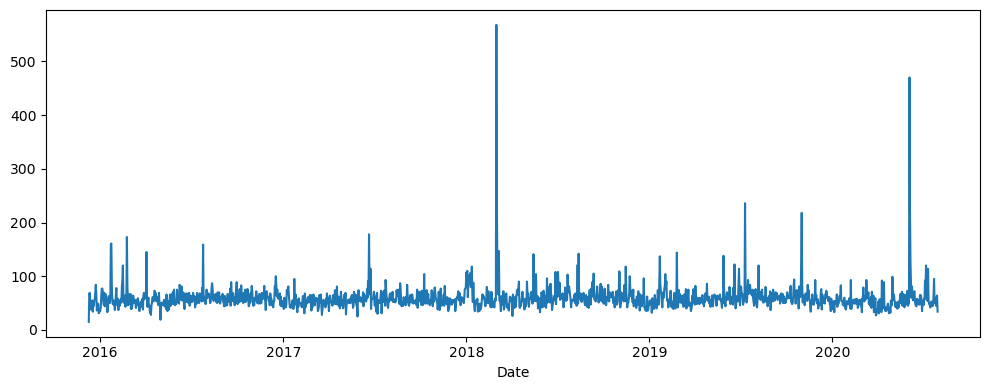

In [38]:
plt.figure(figsize=(10,4))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

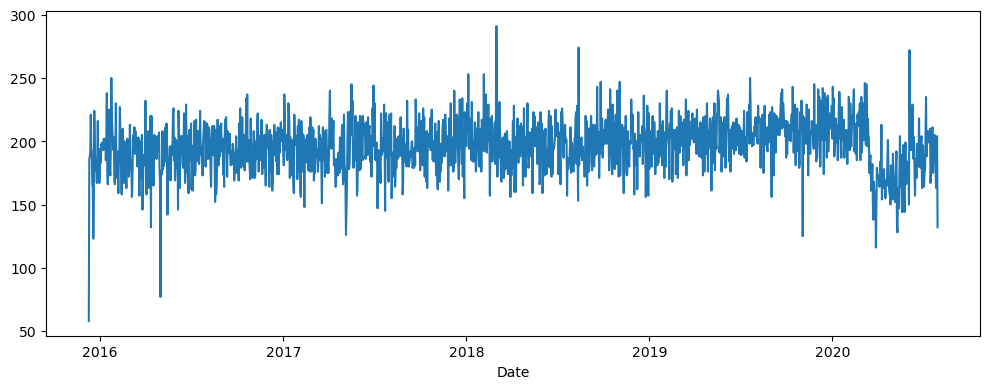

In [39]:
plt.figure(figsize=(10,4))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

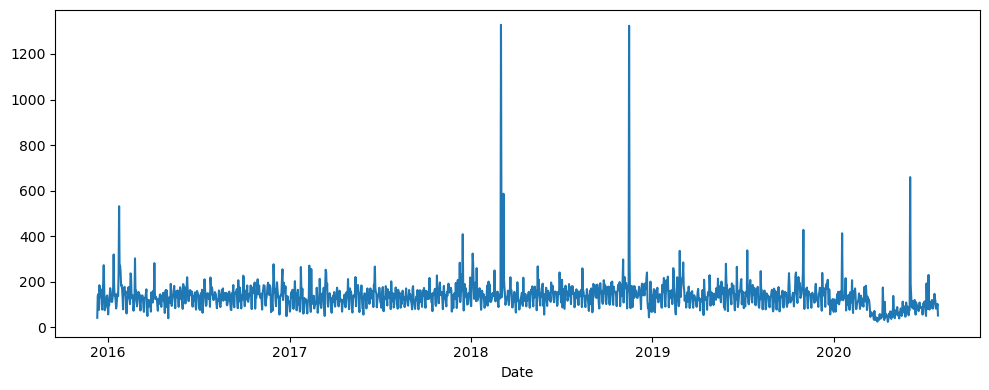

In [40]:
plt.figure(figsize=(10,4))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()